# Machine Problem 1: Parameter Estimation
**Instructions:** Propose the best distribution that best models the given data. To be systematic, you may adopt the following methodology in presenting your results:
- **Step 1.** Visualize the data using a histogram to determine the "most likely" distribution of the data.
- **Step 2.** Determine the probability mass function (or probability density function) of the speculated discrete (or continuous) distribution.
- **Step 3.a** Compute the parameters of the p.m.f. (or p.d.f) using:
    - Method of Moments (MoM)
    - Maximum Likelihood Estimation (MLE)
- **Step 3.b** Determine if the MoM and MLE yield the same estimates. If the estimates are different, select either of the two and justify your choice.
- **Step 4.a** Generate simulated data, $\hat{X}$, by drawing random samples from the model (i.e., the distribution with the estimated parameters).
- **Step 4.b** Compare the original data $X$ with the simulated data $\hat{X}$ to check if they come from the same distribution.
- **Step 5** If they come from the same distribution, propose the model. Otherwise, return to **<em>Step 2</em>**.

You are provided with the following functions (written in JULIA) that can help you diagnose the model:
- **<em>plot_reconstruction</em>** plots the original data against the simulated data.
- **<em>get_p_val</em>** computes the p-value when comparing the original data and the simulated data using the <em>Approximate Two Sample Kolmogorov-Smirnov Test</em>. <em> Note: the null hypothesis of this test states that the compared groups are drawn from the same distribution.</em>
- **<em>if_dist_different</em>** extends **<em>get_p_val</em>** with a decision on whether or not there is sufficient evidence to reject the null hypothesis.

In [10]:
### Write the PMF and PDF here

In [11]:
function plot_reconstruction(orig_data, recon_data, bins=100)
    p_val = get_p_val(orig_data, recon_data)
    if p_val < 0.0001
        p_label = "< 0.0001"
    else
        p_label = "=$p_val"
    end
    p1 = histogram(orig_data, bins=bins, normalize=:true,color=:red, label="Original")
    p2 = histogram(recon_data, bins=bins, normalize=:true,color=:green, label="Reconstruction (p "* p_label * ")")
    fig = plot(p1,p2, layout=(2,1))
    display(fig)
end

function get_p_val(original, reconstruction,precision=3)
    z = ApproximateTwoSampleKSTest(original, reconstruction)
    p = pvalue(z)
    return round(p, digits=precision)
end

function if_dist_different(original, reconstruction, alpha=0.05)
    p = get_p_val(original, reconstruction)
    if p <= alpha
        if p >= 0.0001
            print("The two distributions are significantly different (p = $p)")
        else
            print("The two distributions are significantly different (p < 0.0001)")
        end
    else
        print("The two distributions are not significantly different (p = $p)")   
    end
end

if_dist_different (generic function with 2 methods)

In [12]:
### This loads the libraries needed for this exercise
using Distributions
using Plots
using CSV
using DataFrames
using HypothesisTests

## Example

In [13]:
norm_d = Normal(100, 15)
num_samples = 10000
X = rand(norm_d, num_samples);

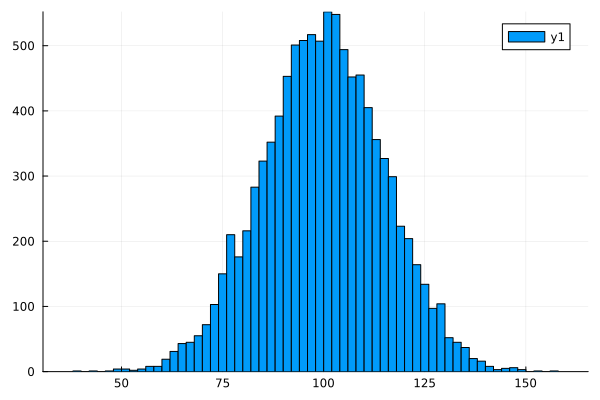

In [14]:
## Step 1
fig1 = plot()
histogram(X,bins=100)

In [15]:
## Step 2: "data is likely normal"..Use the p.d.f. of the univariate normal dist.

In [16]:
## Step 3.a.: Compute the estimates using MLE or MoM. Code the estimators as functions. 
function mle_mean_normal(samples)
    return mean(samples) 
end

function mle_std_normal(samples)
    return std(samples)
end

mle_std_normal (generic function with 1 method)

In [17]:
## Step 3.b. Determine if the MoM and MLE yield the same estimates.

In [18]:
## Step 4.a
μ̂ = mle_mean_normal(X)
σ̂ = mle_std_normal(X)
sim_d = Normal(μ̂,σ̂)
X̂ = rand(sim_d, 10000);

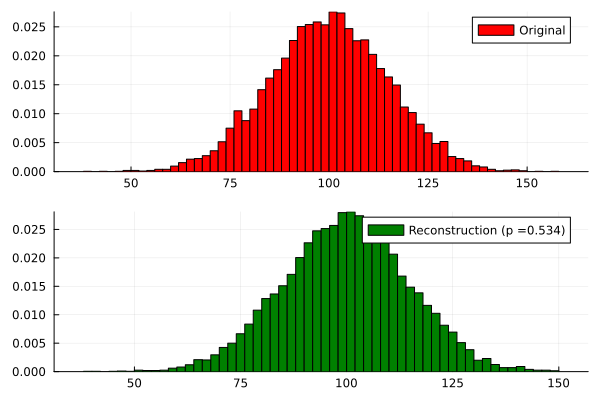

The two distributions are not significantly different (p = 0.534)

In [19]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

In [20]:
## Step 5. The test suggests that the two datasets are drawn from the same distribution. Thus, we will propose the estimates derived by the MLE and MoM

# Exercise 2

### Step 1: Plot the histogram

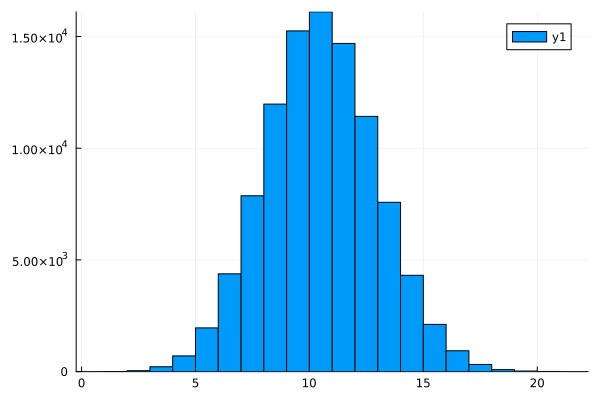

In [22]:
dataset = CSV.read("ex2_data.csv", DataFrame);
X = dataset[!,2];

fig1 = plot()
histogram(X,bins=20)

### Step 2: Determine the probability mass function
The data is likely a binomial distribution. The probability mass function of the Binomial distribution is given by $P\left(x\right | N,p) = {N \choose x} p^{x}\left(1-p\right)^{N-x}$.<br>

### Step 3.a: Compute the parameters of the p.m.f.
#### Method of moments
We know beforehand that $\mathbb{E}\left[X\right] = Np$. Hence, let $X$ be Binomial random variable with parameters $N,p$.

$$
\begin{aligned}
\mathbb{E}\left[X\right] &= \frac{1}{N}\sum_{i}X_i \\

Var\left[X\right] &= \frac{1}{N}\sum_i \left(X_i - \bar{x}\right)^2\\

Np &= \frac{1}{n}\sum_{i}X_i \text{ (Eqn 1) }, \\

Np(1-p) &= \frac{1}{N}\sum_i \left(X_i - \bar{x}\right)^2 \text{ (Eqn 2) }\\
\end{aligned}
$$

We can rewrite Eqn 1 as $N^2 p = \sum_i {X_i}$ and Eqn 2 as $N^2 p \left(1-p\right) = \sum_i \left(X_i - \bar{x}\right)^2$. Thus, we have: 
$$
\begin{aligned}
1 - p = \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}.
\end{aligned}
$$

By simplifying the expression, we would result to
$$
\begin{aligned}
p \approx \hat{p} = 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}
\end{aligned}
$$

By subtituting this p into Equation 1, we would get
$$
\begin{aligned}
\bar{x} = N\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)
\end{aligned}
$$

Isolating N, we would get
$$
\begin{aligned}
N \approx \hat{N} = \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}
\end{aligned}
$$

#### Maximum Likelihood Estimation
Let $X$ be Binomial random variable with parameters $N,p$.

$$
\begin{aligned}
L(N, p|\xi)=&P(X_1=x_1, X_2=x_2, ... X_n=x_n|N, p)\\
=&\prod_{i=1}^{n}f(x_i|N, p)\\
=&\prod_{i=1}^{n}{N \choose x} p^{x}\left(1-p\right)^{N-x}\\
=&{N \choose x}^{n}{p^{\sum_{i=1}^{n}x_{i}}}{(1-p)^{\sum_{i=1}^{n}N-x_{i}}}\\

&\textit{taking the log-likelihood, }\\
l(N, p|\xi)=&ln\Big({N \choose x}^{n}{p^{\sum_{i=1}^{n}x_{i}}}{(1-p)^{\sum_{i=1}^{n}N-x_{i}}}\Big)\\
=&\ln({N \choose x}^{n})+\ln(p^{\sum_{i=1}^{n}x_{i}})+\ln\Big((1-p)^{\sum_{i=1}^{n}N-x_{i}}\Big)\\
=&n\ln({N \choose x})+\sum_{i=1}^{n}x_{i}\ln(p)+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\

&\textit{taking the partial derivative, }  &\\
\frac{\partial}{\partial p}l(p)=&\frac{\partial}{\partial p}n\ln({N \choose x})+\frac{\partial}{\partial p} \sum_{i=1}^{n}x_{i}\ln(p)+\frac{\partial}{\partial p} \Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\
0=& 0 + \frac{\partial}{\partial p} \sum_{i=1}^{n}x_{i}\ln(p)+\frac{\partial}{\partial p} \Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\
0=&\sum_{i=1}^{n}x_{i} \frac{\partial}{\partial p} \ln(p)+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\frac{\partial}{\partial p} \ln(1-p)\\
0=&\sum_{i=1}^{n}x_{i}\frac{1}{p}+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\frac{-1}{1-p}\\
0=&\frac{\sum_{i=1}^{n}x_{i}}{p}-\frac{\sum_{i=1}^{n}N-x_{i}}{1-p}\\
\Big(\frac{1-p}{\sum_{i=1}^{n}x_{i}}\Big)\Big(\frac{\sum_{i=1}^{n}x_{i}}{p}\Big)=&\Big(\frac{\sum_{i=1}^{n}N-x_{i}}{1-p}\Big)\Big(\frac{1-p}{\sum_{i=1}^{n}x_{i}}\Big)\\
\frac{1-p}{p}=&\frac{\sum_{i=1}^{n}N-x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\frac{1}{p}-1=&\frac{\sum_{i=1}^{n}N-x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\frac{1}{p}-1=&\frac{\sum_{i=1}^{n}N}{\sum_{i=1}^{n}x_{i}}- \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\Big(\frac{1}{p}\Big)^{-1}=&\Big(\frac{\sum_{i=1}^{n}N}{\sum_{i=1}^{n}x_{i}}\Big)^{-1}\\
p \approx \hat{p} =& \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}N}
\end{aligned}
$$

Looking at this MLE, we can transform this into the equation
$$
\begin{aligned}
\Big(\sum_{i=1}^{n}N\Big)p = \sum_{i=1}^{n}x_{i}
\end{aligned}
$$
This is similar to the equation, $\mathbb{E}\left[X\right]$ = Np. Hence, it is safe to assume that the MoM and MLE estimates are the same with one another. 

In [23]:
### MOM ###
function mom_p_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return 1 - sum_sq_diff/sum_x
end

function mom_N_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end
 
### MLE ###
function mle_N_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end

function mle_p_estimator(samples)
    N = mle_N_estimator(samples) * length(samples) 
    sum_x = sum(samples)
    return sum_x / N
end

mle_p_estimator (generic function with 1 method)

### Step 3.b: Determine if the MoM and MLE yield the same estimates

In [26]:
print("Method of moments: ", mom_p_estimator(X))
print("\n")
print("Maximum Likelihood Estimation: ", mle_p_estimator(X))

Method of moments: 0.40016588576156475
Maximum Likelihood Estimation: 0.40016588576156475

Based on the results, MoM and MLE gave similar p estimates. 

### Step 4.a: Generate simulated data

In [27]:
N = mom_n_estimator(X)
p = mom_p_estimator(X)
sim_d = Binomial(round(N),p)
X̂ = rand(sim_d, 100000);

### Step 4.b: Compare the original data with the simulated data

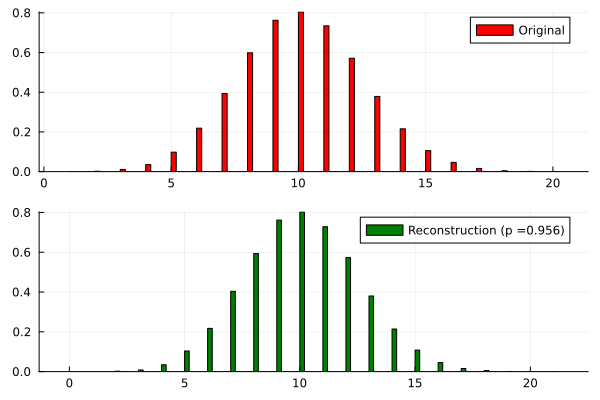

The two distributions are not significantly different (p = 0.956)

In [9]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

### Step 5: Conclusion
Based on the results, we can conclude that both are drawn from the same distribution since there is no significant difference between the two. In conclusion, we can propose the model derived from MoM and MLE.

$$
\begin{aligned}
p \approx \hat{p} =& 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i} \\

p \approx \hat{p} =& \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}N}\\

n \approx \hat{n} =& \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}
\end{aligned}
$$